# Exploratory Data Analysis on the whole Linkedin Data Science Jobs

In [39]:
# Importing Required Libraries
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

**Merging Cleaned Linkedin data and Exctacted Data from Job descriptions**

In [ ]:
df_Jobs = pd.read_excel('Jobs.xlsx') # Cleaned Linkedin Data
df_JD = pd.read_excel('JD_data_cleaned.xlsx') # Job Description Data with extracted skills and education information

In [ ]:
df_Jobs.head(1)

In [ ]:
df_JD.head(1)

* In order to merge both datasets we need to have unique feature for which I'm just creating a unique_id in each of the datasets and Merging them together based on that unique_id.

In [ ]:
# Adding a unique identifier column to df_Jobs
df_Jobs['unique_id'] = range(len(df_Jobs))

# Adding a unique identifier column to df_JD
df_JD['unique_id'] = range(len(df_JD))

# Performing the merge based on the unique identifier column
LD_data = df_Jobs.merge(df_JD, on='unique_id')

# Once its merged, removed the unique identifier column as it was of no use
LD_data = LD_data.drop('unique_id', axis=1)

* When I have merged the data it created duplicates of Job description and also Job description and Job location features are of no more use. So dropping both of them.

In [ ]:
LD_data = LD_data.drop(labels = ['Job_description_x','Job_description_y','Job_location'], axis = 1)

In [15]:
LD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Job_title                  2346 non-null   object        
 1   Company                    2346 non-null   object        
 2   Post_time                  2346 non-null   int64         
 3   Applicants_count           2346 non-null   int64         
 4   Seniority_level            2346 non-null   object        
 5   Employment_type            2346 non-null   object        
 6   Job_function               2346 non-null   object        
 7   Industries                 2346 non-null   object        
 8   Days_posted                2346 non-null   datetime64[ns]
 9   Days_posted_Months         2346 non-null   int64         
 10  Days_posted_Days           2346 non-null   int64         
 11  Days_posted_Quarter        2346 non-null   int64         
 12  City  

In [4]:
LD_data.columns

Index(['Job_title', 'Company', 'Post_time', 'Applicants_count',
       'Seniority_level', 'Employment_type', 'Job_function', 'Industries',
       'Days_posted', 'Days_posted_Months', 'Days_posted_Days',
       'Days_posted_Quarter', 'City', 'State', 'skill_python', 'skill_SQL',
       'skill_ML', 'skill_AI', 'skill_cloud', 'skill_analyst', 'skill_DE',
       'Education_level_masters', 'Education_level_bachelors',
       'Education_level_phd'],
      dtype='object')

* Distribution of Job Titles:
    * Plotting a bar chart to visualize the frequency of different job titles.
    * Identifying the most common job titles in the dataset.

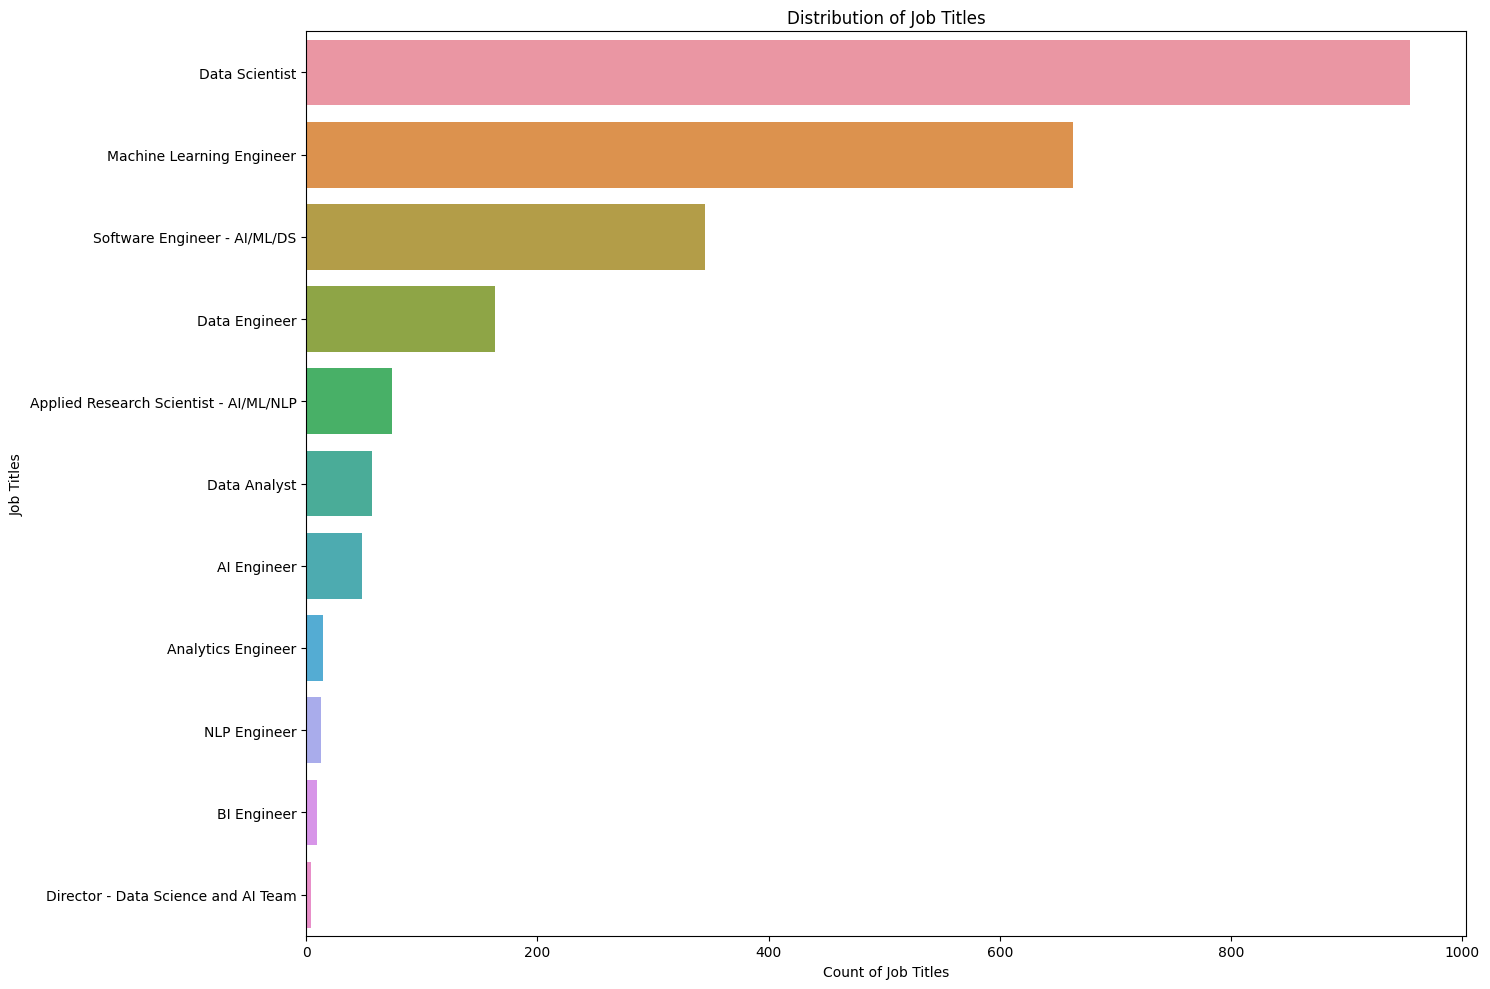

In [14]:

# Plotting bar chart of job titles
fig=plt.figure(figsize=(15, 10))
job_title_counts = LD_data['Job_title'].value_counts()
sns.barplot(x=job_title_counts.values, y=job_title_counts.index)
plt.xticks(rotation=0)
plt.xlabel('Count of Job Titles')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles')
plt.tight_layout()
plt.show()


* Data Scientist and Machine Learning Engineers are highly in demand in current Jobs market

 ****

* Distribution of Applicants Count:
    * Plotting a histogram or box plot to visualize the distribution of applicants count.
    * Identifying the range and central tendency of the number of applicants.

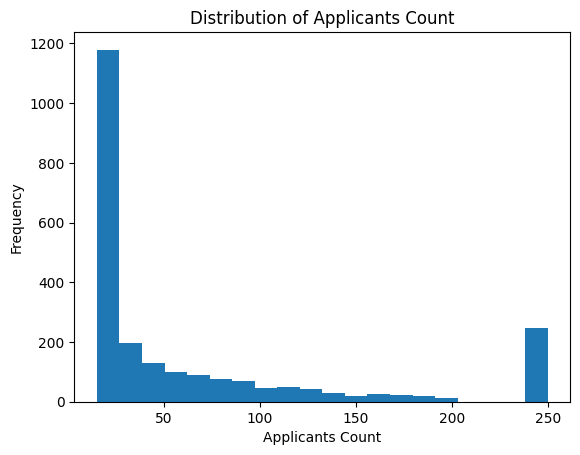

In [15]:
# Plot histogram of applicants count
plt.hist(LD_data['Applicants_count'], bins=20)
plt.xlabel('Applicants Count')
plt.ylabel('Frequency')
plt.title('Distribution of Applicants Count')
plt.show()


* High Distribution shows the Applicants for less than 50 applicants which is good sign for less competition
* But still there around 250 Job postings with applicats near about 250 applicants.

****

* Seniority Level Analysis:
    * Plotting a count plot to analyze the distribution of seniority levels.
    * Identifying the most common seniority levels in the dataset.

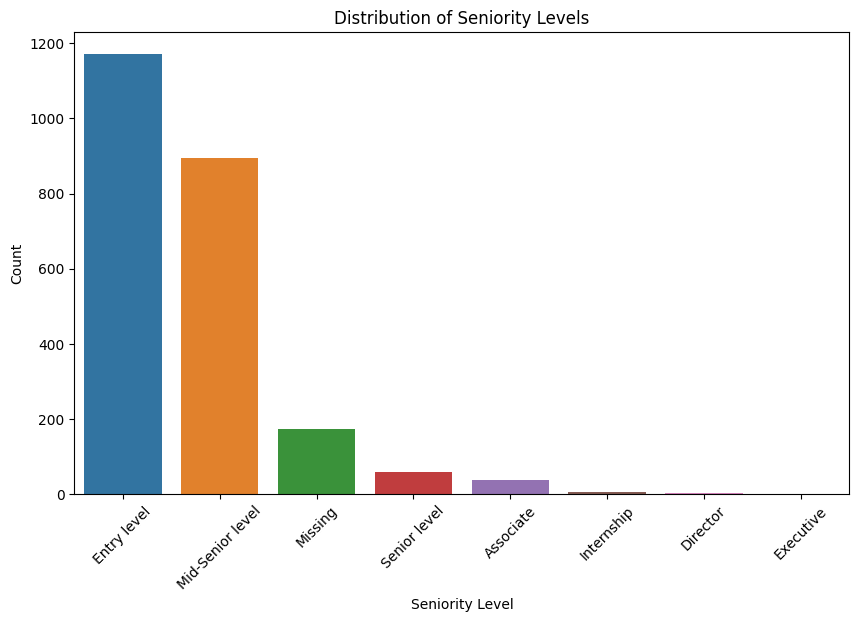

In [40]:
# Plotting count plot of seniority levels
plt.figure(figsize=(10, 6))
sns.countplot(data=LD_data, x='Seniority_level', order=LD_data['Seniority_level'].value_counts().index)
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.title('Distribution of Seniority Levels')
plt.xticks(rotation=45)
plt.show()


* Majority of the Job Postings are related to Entry-Level positions which creates great job opportunities for student graduate.
* Also looks like data Job market is showing more intreset hiring Professionals with more than 3+ years of experience.

****

* Education Level Analysis:
    * Plotting a pie chart to visualize the distribution of education levels.
    * Showcasing the percentage of job listings requiring different education levels.

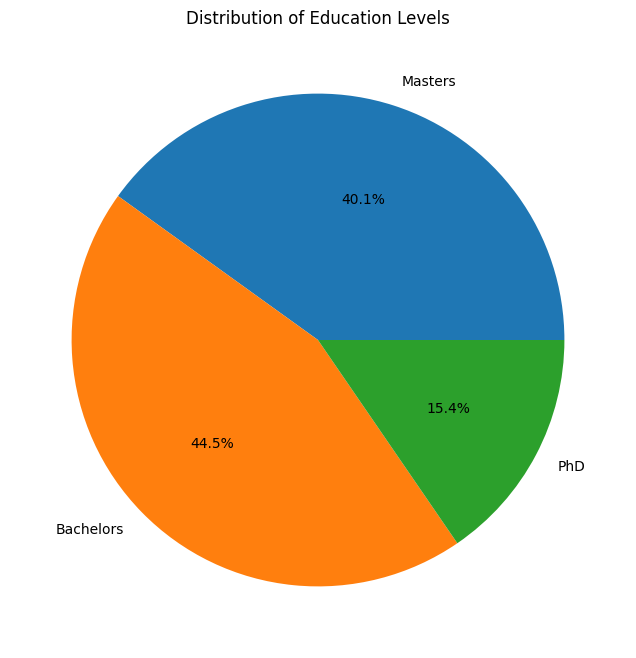

In [20]:
# Plotting pie chart of education levels
plt.figure(figsize=(8, 8))
education_counts = LD_data[['Education_level_masters', 'Education_level_bachelors', 'Education_level_phd']].sum()
labels = ['Masters', 'Bachelors', 'PhD']
plt.pie(education_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Education Levels')
plt.show()


* Nearly 50% of the Job postings just asking for Bachelors degree, But still there are almost 40% which are asking for Master's degree.
* Data is unbiased and limiting the oppurtunities for Bachelor's degree students or professionals.

****

* City and State Analysis:
    * Using a bar chart or count plot to analyze the distribution of job postings across different cities or states.
    * Identifying the top 10 cities or states with the highest number of job postings.

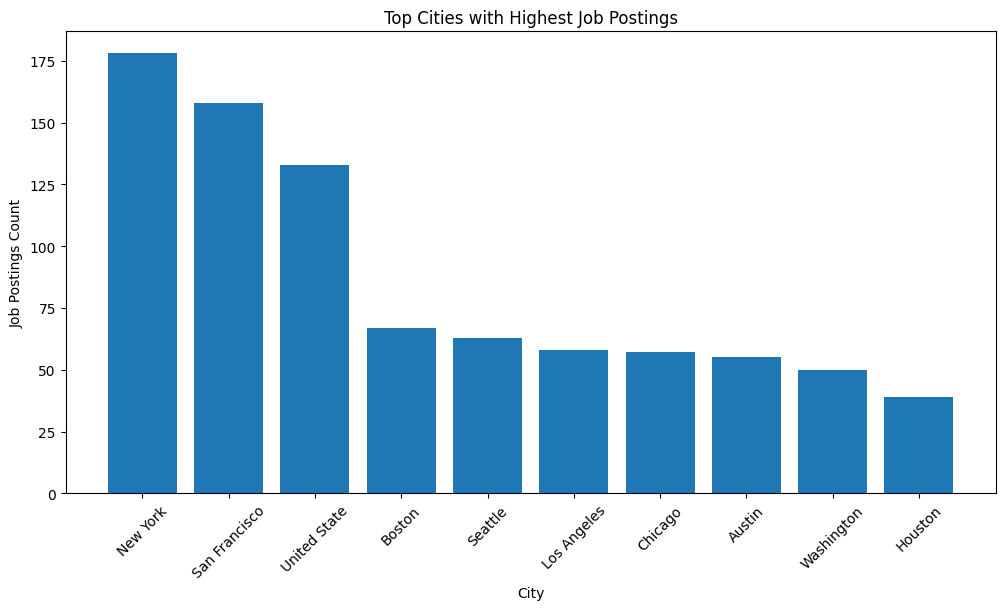

In [32]:
# Plotting bar chart of top cities
plt.figure(figsize=(12, 6))
city_counts = LD_data['City'].value_counts().head(10)
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Job Postings Count')
plt.title('Top Cities with Highest Job Postings')
plt.show()

* Top citites to consider applying for Data Jobs are **New York City, San Francisco Bay Area**. Applicants can also consider applying for Remote Positions as they contribute to the 125 Job postings.

****

**EDA Analysis using Plotly**

In [26]:


LD_data['Post_year'] = LD_data['Days_posted'].dt.year

# Group by month and year and count the number of job postings
post_counts = LD_data.groupby(['Post_year', 'Days_posted_Months']).size().reset_index(name='Count')

# Plot interactive line chart
fig = px.line(post_counts, x='Days_posted_Months', y='Count', color='Post_year',
              labels={'Days_posted_Months': 'Month', 'Count': 'Job Postings Count'},
              title='Number of Job Postings Over Time')
fig.show()


* Looks like Majority of the Jobs Positing was done on June and July months of 2023, Which means the data science Jobs are picking up

In [12]:
# Group by state and count the number of job postings
state_counts = LD_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Job_Postings']

# Plot interactive choropleth map
fig = px.choropleth(state_counts, locations='State', locationmode='USA-states',
                    color='Job_Postings', scope='usa',
                    title='Distribution of Job Postings by State',
                    labels={'Job_Postings': 'Job Postings Count'}) 
fig.show()


* Looks like from the above plot, **California, Texas, and New York** states are the ones which are recruiting most of the AI family jobs

In [31]:
# Calculate the frequency of each skill
skills = ['skill_python', 'skill_SQL', 'skill_ML', 'skill_AI', 'skill_cloud', 'skill_analyst']
skill_counts = LD_data[skills].sum().sort_values(ascending=False)

# Create horizontal bar chart
fig = go.Figure(data=go.Bar(x=skill_counts, y=skill_counts.index, orientation='h'))
fig.update_layout(title='Top Skills Mentioned in Job Descriptions',
                  xaxis_title='Frequency', yaxis_title='Skill')
fig.show()


 * Looks like Majorty of the Data Jobs are seeking skills like **Python, Data Analytics, and Cloud Skills** majorly.

****

# External Data 

* I have collected external data which has Data Scientist Family Salaries based on the Seniority level in US.

* I'm gonna Merge that data with this LinkedIn data to gain insights about the salaries of the Data Science family

In [29]:
# Uploading the Salaries Data file
salary_data = pd.read_excel('Salary_info.xlsx')

In [18]:
salary_data.columns

Index(['work_year', 'experience_level', 'Job_title', 'salary', 'remote_ratio',
       'company_size'],
      dtype='object')

In [16]:
LD_data.columns

Index(['Job_title', 'Company', 'Post_time', 'Applicants_count',
       'Seniority_level', 'Employment_type', 'Job_function', 'Industries',
       'Days_posted', 'Days_posted_Months', 'Days_posted_Days',
       'Days_posted_Quarter', 'City', 'State', 'skill_python', 'skill_SQL',
       'skill_ML', 'skill_AI', 'skill_cloud', 'skill_analyst', 'skill_DE',
       'Education_level_masters', 'Education_level_bachelors',
       'Education_level_phd'],
      dtype='object')

In [30]:
data = pd.merge(LD_data, salary_data, on=['Job_title', 'Seniority_level'], how='inner')


In [31]:
data.head()

,Job_title,Company,Post_time,Applicants_count,Seniority_level,Employment_type,Job_function,Industries,Days_posted,Days_posted_Months,...,skill_cloud,skill_analyst,skill_DE,Education_level_masters,Education_level_bachelors,Education_level_phd,work_year,salary,remote_ratio,company_size
0,Machine Learning Engineer,Patterned Learning AI,1,58,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-07-08,7,...,0,1,1,1,1,0,2022,108000,No Remote Work,Small
1,Machine Learning Engineer,Patterned Learning AI,1,58,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-07-08,7,...,0,1,1,1,1,0,2022,115000,Hybrid,Large
2,Machine Learning Engineer,Patterned Learning AI,1,58,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-07-08,7,...,0,1,1,1,1,0,2022,180000,Fully Remote,Large
3,Machine Learning Engineer,Patterned Learning AI,1,58,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-07-08,7,...,0,1,1,1,1,0,2022,83000,No Remote Work,Large
4,Machine Learning Engineer,Patterned Learning AI,1,58,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-07-08,7,...,0,1,1,1,1,0,2021,125000,Fully Remote,Small


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123114 entries, 0 to 123113
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Job_title                  123114 non-null  object        
 1   Company                    123114 non-null  object        
 2   Post_time                  123114 non-null  int64         
 3   Applicants_count           123114 non-null  int64         
 4   Seniority_level            123114 non-null  object        
 5   Employment_type            123114 non-null  object        
 6   Job_function               123114 non-null  object        
 7   Industries                 123114 non-null  object        
 8   Days_posted                123114 non-null  datetime64[ns]
 9   Days_posted_Months         123114 non-null  int64         
 10  Days_posted_Days           123114 non-null  int64         
 11  Days_posted_Quarter        123114 non-null  int64   

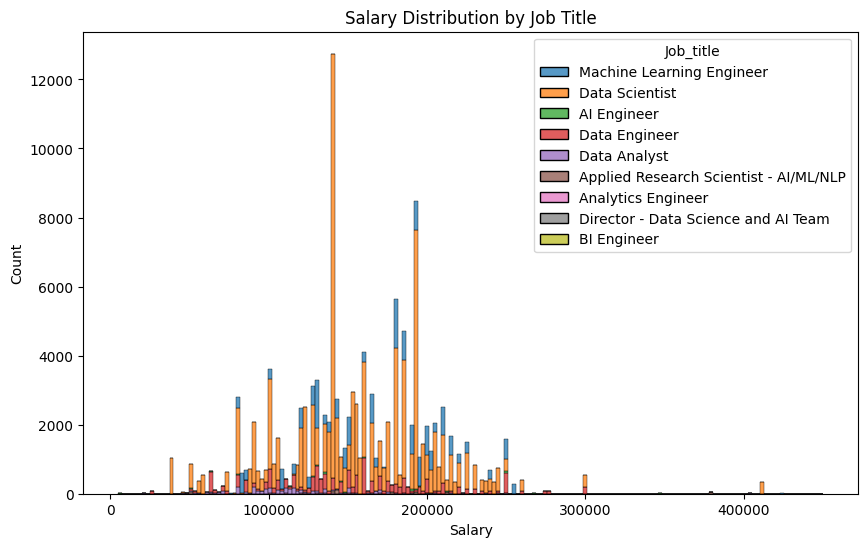

In [33]:
# Histogram of salary distribution by job title
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='salary', hue='Job_title', multiple='stack')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution by Job Title')
plt.show()


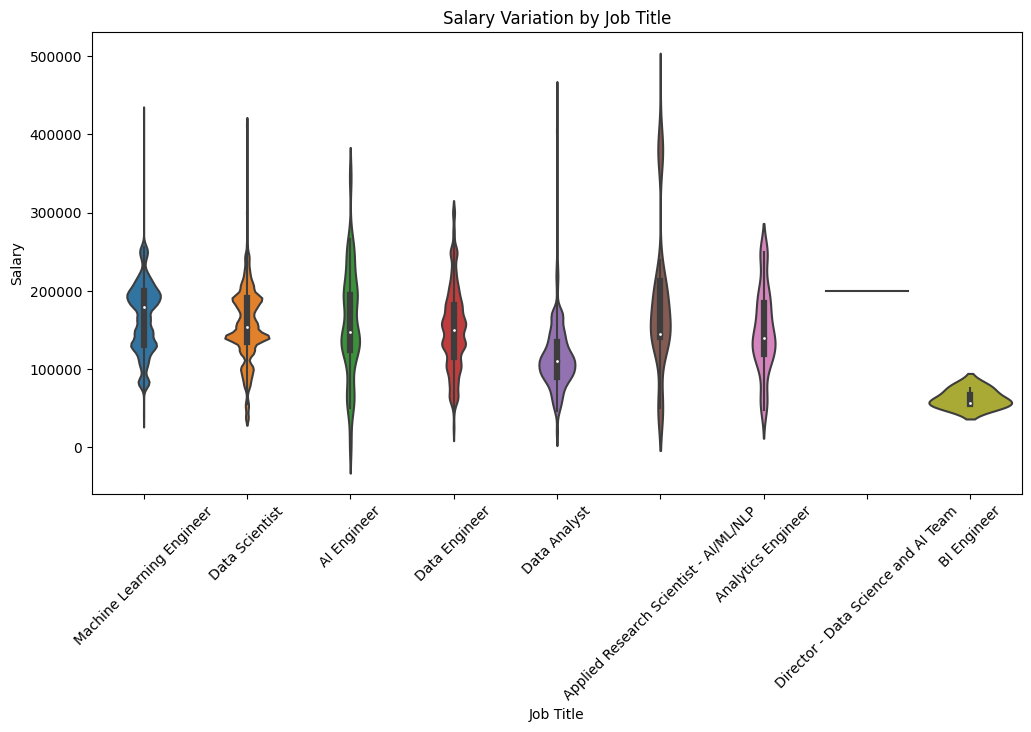

In [38]:
# Violin plot of salary variation by job title
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Job_title', y='salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Variation by Job Title')
plt.xticks(rotation=45)
plt.show()


* Based on the above distribution and Violin plots, It looks like most of the Data Science Jobs salaries are mostly distributed between **$100k - $200k** range